## Import Requirement Library

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

## Extract dataset

In [2]:
zip_path = '.\dataset.zip'
zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall('dataset')
zip_ref.close()


In [3]:
import os

base_dir = 'dataset\dataset'
pet_dir = os.path.join(base_dir,'pet')
hdpe_dir = os.path.join(base_dir,'hdpe')
ldpe_dir = os.path.join(base_dir,'ldpe')
ps_dir = os.path.join(base_dir,'ps')
pp_dir = os.path.join(base_dir,'pp')
pvc_dir = os.path.join(base_dir,'pvc')
other_dir = os.path.join(base_dir,'other')

print('Total file in pet dir {}'.format(len(os.listdir(pet_dir))))
print('Total file in hdpe dir {}'.format(len(os.listdir(hdpe_dir))))
print('Total file in ldpe dir {}'.format(len(os.listdir(ldpe_dir))))
print('Total file in ps dir {}'.format(len(os.listdir(ps_dir))))
print('Total file in pp dir {}'.format(len(os.listdir(pp_dir))))
print('Total file in pvc dir {}'.format(len(os.listdir(pvc_dir))))
print('Total file in other dir {}'.format(len(os.listdir(other_dir))))

pet_files= os.listdir(pet_dir)
print(pet_files[:10])

hdpe_files= os.listdir(hdpe_dir)
print(hdpe_files[:10])

ldpe_files= os.listdir(ldpe_dir)
print(ldpe_files[:10])

ps_files= os.listdir(ps_dir)
print(ps_files[:10])

pp_files= os.listdir(pp_dir)
print(pp_files[:10])

pvc_files= os.listdir(pvc_dir)
print(pvc_files[:10])

other_files= os.listdir(other_dir)
print(other_files[:10])


Total file in pet dir 270
Total file in hdpe dir 270
Total file in ldpe dir 270
Total file in ps dir 250
Total file in pp dir 250
Total file in pvc dir 170
Total file in other dir 180
['0_35L-Spirit-Bottle-000843-scaled_1_11zon.png', '108-1086068_open-crushed-water-bottle-crushed-water-bottle-png_2_11zon.png', '360_F_498362712_7sJRmv7sOsfCtqieE0wtIjUpdUBvF4PY_3_11zon.png', '46726744-crushed-plastic-bottle-isolated-on-white_5_11zon.png', '93850_b88c6b47-8459-46b7-82bc-f28c774af031_4_11zon.png', 'crushed-plastic-bottle-10801423_7_11zon.png', 'crushed-plastic-bottle-isolated-on-white-2GK474W_8_11zon.png', 'crushedemptyplasticbottlebluewithcapmb3dmodel001_6_11zon.png', 'empty-pet-bottle-500x500_9_11zon.png', 'front-view-empty-pet-plastic-green-bottle-isolated-white-157676674_10_11zon.png']
['hdpe_0.png', 'hdpe_1.png', 'hdpe_10.png', 'hdpe_100.png', 'hdpe_101.png', 'hdpe_102.png', 'hdpe_103.png', 'hdpe_104.png', 'hdpe_105.png', 'hdpe_106.png']
['100ml-ldpe-bottle-16216142_1024x_4_11zon.png'

## Visualize some dataset

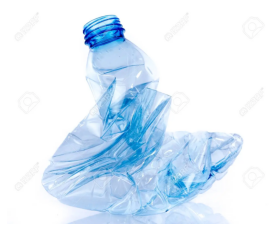

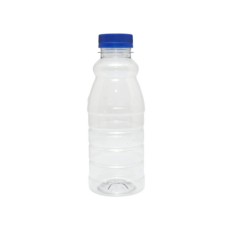

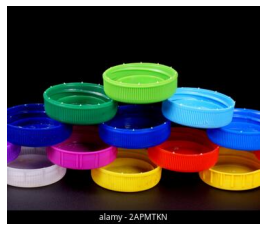

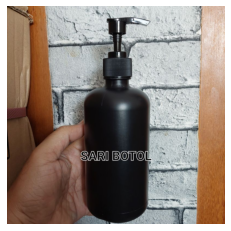

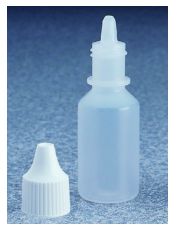

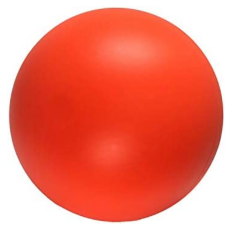

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 5

next_pet = [os.path.join(pet_dir, fname) for fname in pet_files[pic_index-2:pic_index]]
next_hdpe = [os.path.join(hdpe_dir, fname)for fname in hdpe_files[pic_index-2:pic_index]]
next_ldpe = [os.path.join(ldpe_dir, fname) for fname in ldpe_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_pet+next_hdpe+next_ldpe):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()



## Create Train and Val Directory

In [5]:
root_dir = './dataset/tmp_dataset'
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
    os.makedirs(os.path.join(root_path,'validation'))
    os.makedirs(os.path.join(root_path,'validation','pet'))
    os.makedirs(os.path.join(root_path,'validation','ldpe'))    
    os.makedirs(os.path.join(root_path,'validation','hdpe'))    
    os.makedirs(os.path.join(root_path,'validation','ps'))    
    os.makedirs(os.path.join(root_path,'validation','pp'))
    os.makedirs(os.path.join(root_path,'validation','pet'))        
    os.makedirs(os.path.join(root_path,'validation','other')) 
    
    os.makedirs(os.path.join(root_path,'training'))
    os.makedirs(os.path.join(root_path,'training','pet'))
    os.makedirs(os.path.join(root_path,'training','ldpe'))    
    os.makedirs(os.path.join(root_path,'training','hdpe'))    
    os.makedirs(os.path.join(root_path,'training','ps'))    
    os.makedirs(os.path.join(root_path,'training','pp'))
    os.makedirs(os.path.join(root_path,'training','pet'))        
    os.makedirs(os.path.join(root_path,'training','other'))  

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

You should not be seeing this since the upper directory is removed beforehand


In [6]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./dataset/tmp_dataset\validation
./dataset/tmp_dataset\validation\hdpe
./dataset/tmp_dataset\validation\ldpe
./dataset/tmp_dataset\validation\pet
./dataset/tmp_dataset\validation\pp
./dataset/tmp_dataset\validation\ps


In [7]:
root_dir = './dataset/tmp_dataset'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
    
    os.makedirs(os.path.join(root_path,'validation','pet'))
    os.makedirs(os.path.join(root_path,'validation','hdpe'))
    os.makedirs(os.path.join(root_path,'validation','ldpe'))
    os.makedirs(os.path.join(root_path,'validation','pp'))
    os.makedirs(os.path.join(root_path,'validation','ps'))
    os.makedirs(os.path.join(root_path,'validation','pvc'))
    os.makedirs(os.path.join(root_path,'validation','other'))
    os.makedirs(os.path.join(root_path,'training','pet')) 
    os.makedirs(os.path.join(root_path,'training','hdpe'))
    os.makedirs(os.path.join(root_path,'training','ldpe'))
    os.makedirs(os.path.join(root_path,'training','pp'))
    os.makedirs(os.path.join(root_path,'training','ps'))
    os.makedirs(os.path.join(root_path,'training','pvc'))
    os.makedirs(os.path.join(root_path,'training','other'))
    

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [8]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./dataset/tmp_dataset\training
./dataset/tmp_dataset\validation
./dataset/tmp_dataset\training\hdpe
./dataset/tmp_dataset\training\ldpe
./dataset/tmp_dataset\training\other
./dataset/tmp_dataset\training\pet
./dataset/tmp_dataset\training\pp
./dataset/tmp_dataset\training\ps
./dataset/tmp_dataset\training\pvc
./dataset/tmp_dataset\validation\hdpe
./dataset/tmp_dataset\validation\ldpe
./dataset/tmp_dataset\validation\other
./dataset/tmp_dataset\validation\pet
./dataset/tmp_dataset\validation\pp
./dataset/tmp_dataset\validation\ps
./dataset/tmp_dataset\validation\pvc


In [9]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    len_source_dir = len(os.listdir(SOURCE_DIR))
    len_split_file = round(len_source_dir * SPLIT_SIZE)
    shuffle_file = random.sample(os.listdir(SOURCE_DIR), len_source_dir)
    
    for fname in shuffle_file[:len_split_file]:
        file_source = os.path.join(SOURCE_DIR,fname)
        file_dest = os.path.join(TRAINING_DIR,fname)
        if os.path.getsize(file_source) >0:
            copyfile(file_source, file_dest)
        else:
            print("{} is zero length, so ignoring.".format({fname}))

    for fname in shuffle_file[len_split_file:]:
        file_source = os.path.join(SOURCE_DIR,fname)
        file_dest = os.path.join(VALIDATION_DIR,fname)
        if os.path.getsize(file_source) >0:
            copyfile(file_source, file_dest)
        else:
            print("{} is zero length, so ignoring.".format({fname}))

    ## END CODE HERE
    return shuffle_file

In [10]:
PET_SOURCE_DIR = "./dataset/dataset/pet"
LDPE_SOURCE_DIR = "./dataset/dataset/ldpe"
HDPE_SOURCE_DIR = "./dataset/dataset/hdpe"
PS_SOURCE_DIR = "./dataset/dataset/ps"
PP_SOURCE_DIR = "./dataset/dataset/pp"
PVC_SOURCE_DIR = "./dataset/dataset/pvc"
OTHER_SOURCE_DIR = "./dataset/dataset/other"

TRAINING_DIR = "./dataset/tmp_dataset/training"
VALIDATION_DIR = "./dataset/tmp_dataset/validation"

TRAINING_PET_DIR = os.path.join(TRAINING_DIR,"pet/")
VALIDATION_PET_DIR = os.path.join(VALIDATION_DIR,"pet/")

TRAINING_HDPE_DIR = os.path.join(TRAINING_DIR,"hdpe/")
VALIDATION_HDPE_DIR = os.path.join(VALIDATION_DIR,"hdpe/")

TRAINING_LDPE_DIR = os.path.join(TRAINING_DIR,"ldpe/")
VALIDATION_LDPE_DIR = os.path.join(VALIDATION_DIR,"ldpe/")

TRAINING_PS_DIR = os.path.join(TRAINING_DIR,"ps/")
VALIDATION_PS_DIR = os.path.join(VALIDATION_DIR,"ps/")

TRAINING_PP_DIR = os.path.join(TRAINING_DIR,"pp/")
VALIDATION_PP_DIR = os.path.join(VALIDATION_DIR,"pp/")

TRAINING_PVC_DIR = os.path.join(TRAINING_DIR,"pvc/")
VALIDATION_PVC_DIR = os.path.join(VALIDATION_DIR,"pvc/")

TRAINING_OTHER_DIR = os.path.join(TRAINING_DIR,"other/")
VALIDATION_OTHER_DIR = os.path.join(VALIDATION_DIR,"other/")

split_size = .9

pet = split_data(PET_SOURCE_DIR, TRAINING_PET_DIR, VALIDATION_PET_DIR, split_size)
ldpe = split_data(LDPE_SOURCE_DIR, TRAINING_LDPE_DIR, VALIDATION_LDPE_DIR, split_size)
hdpe = split_data(HDPE_SOURCE_DIR, TRAINING_HDPE_DIR, VALIDATION_HDPE_DIR, split_size)
ps = split_data(PS_SOURCE_DIR, TRAINING_PS_DIR, VALIDATION_PS_DIR, split_size)
pp = split_data(PP_SOURCE_DIR, TRAINING_PP_DIR, VALIDATION_PP_DIR, split_size)
pvc = split_data(PVC_SOURCE_DIR, TRAINING_PVC_DIR, VALIDATION_PVC_DIR, split_size)
other = split_data(OTHER_SOURCE_DIR, TRAINING_OTHER_DIR, VALIDATION_OTHER_DIR, split_size)

print(pet)

['pet_226.png', 'pet_25.png', 'pet_13.png', 'pet_243.png', 'pet_175.png', 'pet_52.png', 'pet_198.png', 'pet_144.png', 'pet_11.png', 'pet_73.png', 'pet_159.png', 'pet_146.png', 'pet_172.png', 'pet_225.png', 'pet_122.png', 'pet_89.png', 'pet_40.png', 'pet_39.png', 'small_Clear_plastic_bottle_2dc92dc39c_19_11zon.png', 'pet_84.png', 'pet_120.png', 'pet_53.png', 'pet_121.png', 'pet_241.png', 'pet_36.png', '108-1086068_open-crushed-water-bottle-crushed-water-bottle-png_2_11zon.png', 'pet_154.png', 'pet_207.png', 'pet_174.png', 'pet_22.png', 'pet_0.png', 'pet_231.png', 'pet_129.png', 'pet_75.png', 'pet_185.png', 'pet_95.png', 'pet_54.png', 'pet_28.png', 'pet_35.png', 'pet_158.png', 'pet_237.png', 'pet_228.png', 'pet_180.png', 'pet_135.png', 'pet_242.png', 'pet_204.png', 'pet_143.png', 'pet_102.png', 'pet_38.png', 'pet_7.png', 'pet_197.png', 'pet_77.png', 'pet_153.png', 'pet_78.png', 'pet_216.png', 'pet_189.png', 'pet_113.png', 'pet_149.png', '0_35L-Spirit-Bottle-000843-scaled_1_11zon.png', 'p

In [11]:
# Test your split_data function
PET_SOURCE_DIR = "./dataset/dataset/pet"
LDPE_SOURCE_DIR = "./dataset/dataset/ldpe"
HDPE_SOURCE_DIR = "./dataset/dataset/hdpe"
PS_SOURCE_DIR = "./dataset/dataset/ps"
PP_SOURCE_DIR = "./dataset/dataset/pp"
PVC_SOURCE_DIR = "./dataset/dataset/pvc"
OTHER_SOURCE_DIR = "./dataset/dataset/other"

TRAINING_DIR = "./dataset/tmp_dataset/training"
VALIDATION_DIR = "./dataset/tmp_dataset/validation"

TRAINING_PET_DIR = os.path.join(TRAINING_DIR,"pet/")
VALIDATION_PET_DIR = os.path.join(VALIDATION_DIR,"pet/")

TRAINING_HDPE_DIR = os.path.join(TRAINING_DIR,"hdpe/")
VALIDATION_HDPE_DIR = os.path.join(VALIDATION_DIR,"hdpe/")

TRAINING_LDPE_DIR = os.path.join(TRAINING_DIR,"ldpe/")
VALIDATION_LDPE_DIR = os.path.join(VALIDATION_DIR,"ldpe/")

TRAINING_PS_DIR = os.path.join(TRAINING_DIR,"ps/")
VALIDATION_PS_DIR = os.path.join(VALIDATION_DIR,"ps/")

TRAINING_PP_DIR = os.path.join(TRAINING_DIR,"pp/")
VALIDATION_PP_DIR = os.path.join(VALIDATION_DIR,"pp/")

TRAINING_PVC_DIR = os.path.join(TRAINING_DIR,"pvc/")
VALIDATION_PVC_DIR = os.path.join(VALIDATION_DIR,"pvc/")

TRAINING_OTHER_DIR = os.path.join(TRAINING_DIR,"other/")
VALIDATION_OTHER_DIR = os.path.join(VALIDATION_DIR,"other/")

print(TRAINING_OTHER_DIR)
# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_PET_DIR)) > 0:
    for file in os.scandir(TRAINING_PET_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_HDPE_DIR)) > 0:
    for file in os.scandir(TRAINING_HDPE_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_LDPE_DIR)) > 0:
    for file in os.scandir(TRAINING_LDPE_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PS_DIR)) > 0:
    for file in os.scandir(TRAINING_PS_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PP_DIR)) > 0:
    for file in os.scandir(TRAINING_PP_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_PVC_DIR)) > 0:
    for file in os.scandir(TRAINING_PVC_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_OTHER_DIR)) > 0:
    for file in os.scandir(TRAINING_OTHER_DIR):
        os.remove(file.path)
        
if len(os.listdir(VALIDATION_PET_DIR)) > 0:
    for file in os.scandir(VALIDATION_PET_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_HDPE_DIR)) > 0:
    for file in os.scandir(VALIDATION_HDPE_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_LDPE_DIR)) > 0:
    for file in os.scandir(VALIDATION_LDPE_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PS_DIR)) > 0:
    for file in os.scandir(VALIDATION_PS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PP_DIR)) > 0:
    for file in os.scandir(VALIDATION_PP_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_PVC_DIR)) > 0:
    for file in os.scandir(VALIDATION_PVC_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_OTHER_DIR)) > 0:
    for file in os.scandir(VALIDATION_OTHER_DIR):
        os.remove(file.path)

# Define proportion of images used for training
split_size = .7

split_data(PET_SOURCE_DIR, TRAINING_PET_DIR, VALIDATION_PET_DIR, split_size)
split_data(LDPE_SOURCE_DIR, TRAINING_LDPE_DIR, VALIDATION_LDPE_DIR, split_size)
split_data(HDPE_SOURCE_DIR, TRAINING_HDPE_DIR, VALIDATION_HDPE_DIR, split_size)
split_data(PS_SOURCE_DIR, TRAINING_PS_DIR, VALIDATION_PS_DIR, split_size)
split_data(PP_SOURCE_DIR, TRAINING_PP_DIR, VALIDATION_PP_DIR, split_size)
split_data(PVC_SOURCE_DIR, TRAINING_PVC_DIR, VALIDATION_PVC_DIR, split_size)
split_data(OTHER_SOURCE_DIR, TRAINING_OTHER_DIR, VALIDATION_OTHER_DIR, split_size)

print(f"\n\nOriginal pet's directory has {len(os.listdir(PET_SOURCE_DIR))} images")
print(f"Original hdpe's directory has {len(os.listdir(HDPE_SOURCE_DIR))} images\n")
print(f"Original ldpe's directory has {len(os.listdir(LDPE_SOURCE_DIR))} images\n")
print(f"Original ps's directory has {len(os.listdir(PS_SOURCE_DIR))} images\n")
print(f"Original pp's directory has {len(os.listdir(PP_SOURCE_DIR))} images\n")
print(f"Original pvc's directory has {len(os.listdir(PVC_SOURCE_DIR))} images\n")
print(f"Original other's directory has {len(os.listdir(OTHER_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_PET_DIR))} images of PET for training")
print(f"There are {len(os.listdir(TRAINING_HDPE_DIR))} images of HDPE for training")
print(f"There are {len(os.listdir(TRAINING_LDPE_DIR))} images of LDPE for training")
print(f"There are {len(os.listdir(TRAINING_PS_DIR))} images of PS for training")
print(f"There are {len(os.listdir(TRAINING_PP_DIR))} images of PP for training")
print(f"There are {len(os.listdir(TRAINING_PVC_DIR))} images of PVC for training")
print(f"There are {len(os.listdir(TRAINING_OTHER_DIR))} images of OTHER for training")

print(f"There are {len(os.listdir(VALIDATION_PET_DIR))} images of PET for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_HDPE_DIR))} images of HDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_LDPE_DIR))} images of LDPE for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PS_DIR))} images of PS for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PP_DIR))} images of PP for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_PVC_DIR))} images of PVC for VALIDATION")
print(f"There are {len(os.listdir(VALIDATION_OTHER_DIR))} images of OTHER for VALIDATION")


./dataset/tmp_dataset/training\other/


Original pet's directory has 270 images
Original hdpe's directory has 270 images

Original ldpe's directory has 270 images

Original ps's directory has 250 images

Original pp's directory has 250 images

Original pvc's directory has 170 images

Original other's directory has 180 images

There are 189 images of PET for training
There are 189 images of HDPE for training
There are 189 images of LDPE for training
There are 175 images of PS for training
There are 175 images of PP for training
There are 119 images of PVC for training
There are 126 images of OTHER for training
There are 81 images of PET for VALIDATION
There are 81 images of HDPE for VALIDATION
There are 81 images of LDPE for VALIDATION
There are 75 images of PS for VALIDATION
There are 75 images of PP for VALIDATION
There are 51 images of PVC for VALIDATION
There are 54 images of OTHER for VALIDATION


In [12]:
import tensorflow as tf
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),  
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(7, activation='softmax')
# ])

# Print the model summary
base_model.summary()



Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [13]:
base_model.trainable = False

In [14]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [15]:
prediction_layer = tf.keras.layers.Dense(7,activation='softmax')

In [16]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    prediction_layer
])

In [17]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')  
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                              batch_size=45,
                                              class_mode='binary',
                                              target_size=(150, 150))
    validation_datagen = ImageDataGenerator(rescale=1./255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')  
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                      batch_size=45,
                                                      class_mode='binary',
                                                      target_size=(150, 150))
    return train_generator,validation_generator

In [18]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

print(TRAINING_DIR)
label_map = (train_generator.class_indices)
print(label_map)

Found 1162 images belonging to 7 classes.
Found 498 images belonging to 7 classes.
./dataset/tmp_dataset/training
{'hdpe': 0, 'ldpe': 1, 'other': 2, 'pet': 3, 'pp': 4, 'ps': 5, 'pvc': 6}


In [19]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
len(model.trainable_variables)

8

In [21]:
history = model.fit(train_generator,
                    epochs=200,
                    validation_data=validation_generator)

Epoch 1/200
26/26 [==============================] - 59s 2s/step - loss: 2.0154 - accuracy: 0.2281 - val_loss: 1.6504 - val_accuracy: 0.3775
Epoch 2/200
26/26 [==============================] - 48s 2s/step - loss: 1.7193 - accuracy: 0.3563 - val_loss: 1.4868 - val_accuracy: 0.4679
Epoch 3/200
26/26 [==============================] - 48s 2s/step - loss: 1.5750 - accuracy: 0.4122 - val_loss: 1.3330 - val_accuracy: 0.5141
Epoch 4/200
26/26 [==============================] - 49s 2s/step - loss: 1.4514 - accuracy: 0.4544 - val_loss: 1.3060 - val_accuracy: 0.5201
Epoch 5/200
26/26 [==============================] - 48s 2s/step - loss: 1.3920 - accuracy: 0.4845 - val_loss: 1.2016 - val_accuracy: 0.5723
Epoch 6/200
26/26 [==============================] - 48s 2s/step - loss: 1.3172 - accuracy: 0.5207 - val_loss: 1.1693 - val_accuracy: 0.5723
Epoch 7/200
26/26 [==============================] - 48s 2s/step - loss: 1.2603 - accuracy: 0.5456 - val_loss: 1.1807 - val_accuracy: 0.5743
Epoch 8/200
2

In [22]:
accuracy_score = model.evaluate(train_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])

26/26 [==============================] - 35s 1s/step - loss: 0.1577 - accuracy: 0.9441
[0.15773536264896393, 0.9440619349479675]
Accuracy: 94.4062%
Loss:  0.15773536264896393


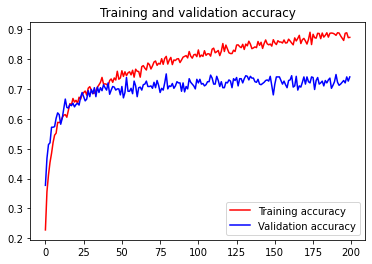

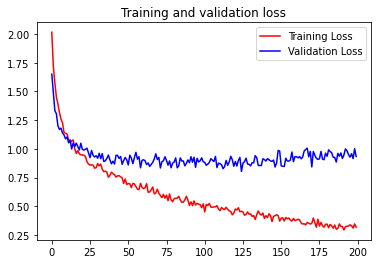

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
!pip install ipywidgets
!pip install Pillow


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [38]:
from IPython.display import display
import ipywidgets as widgets
import io
from PIL import Image
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import img_to_array, load_img

upload_widget = widgets.FileUpload()
display(upload_widget)

def on_upload_button_clicked(change):
    uploaded_image = upload_widget.value[list(upload_widget.value.keys())[0]]['content']
    pil_image = Image.open(io.BytesIO(uploaded_image))
    resized_image = pil_image.resize((224, 224))

    display(resized_image)

    x = img_to_array(resized_image)

    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)

    filename = list(upload_widget.value.keys())[0]
    print("Filename:", filename)
#     print("Classes:", classes)
    label_name = list(filter(lambda x: train_generator.class_indices[x] == np.argmax(classes), train_generator.class_indices))[0]
    print( f"{classes}, category: {np.argmax(classes)}, label: {label_name}")

upload_button = widgets.Button(description="Upload")
upload_button.on_click(on_upload_button_clicked)

# Display the button
display(upload_button)


FileUpload(value={}, description='Upload')

Button(description='Upload', style=ButtonStyle())

In [26]:
label_map = (train_generator.class_indices)
print(label_map)

{'hdpe': 0, 'ldpe': 1, 'other': 2, 'pet': 3, 'pp': 4, 'ps': 5, 'pvc': 6}


# EXPORT TFLITE

In [27]:
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)


INFO:tensorflow:Assets written to: saved_model/1\assets


INFO:tensorflow:Assets written to: saved_model/1\assets


In [28]:
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [29]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations =[optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [30]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

3335952